<a href="https://colab.research.google.com/github/ericyoc/ml_portfolio/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#decision trees

import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
def main():

    # download dataset
    my_data = pd.read_csv('ml_data/drug200.csv', delimiter=",")

    my_data.head()
    print(my_data.head())

    my_data.shape
    print(my_data.shape)

    # pre-processing
    # Remove the column containing the target name since it doesn't contain numeric values.
    X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
    X[0:5]
    print(X[0:5])

    # some features in this dataset are categorical, such as Sex or BP. Unfortunately,
    # Sklearn Decision Trees does not handle categorical variables.
    # We can still convert these features to numerical values using the LabelEncoder() method to convert the categorical variable into dummy/indicator variables
    from sklearn import preprocessing
    le_sex = preprocessing.LabelEncoder()
    le_sex.fit(['F','M'])
    X[:,1] = le_sex.transform(X[:,1])


    le_BP = preprocessing.LabelEncoder()
    le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
    X[:,2] = le_BP.transform(X[:,2])


    le_Chol = preprocessing.LabelEncoder()
    le_Chol.fit([ 'NORMAL', 'HIGH'])
    X[:,3] = le_Chol.transform(X[:,3])

    print(X[0:5])

    # fill the target variable.
    y = my_data["Drug"]
    print(y[0:5])

    # setting up decision tree
    from sklearn.model_selection import train_test_split
    X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
    print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))
    print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))


    # modeling
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
    print(drugTree) # it shows the default parameters
    drugTree.fit(X_trainset,y_trainset)

    # prediction
    predTree = drugTree.predict(X_testset)
    print(predTree [0:5])
    print(y_testset [0:5])

    # evaluation
    from sklearn import metrics
    import matplotlib.pyplot as plt
    print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

    # visualization
    from sklearn.tree import export_graphviz
    from sklearn import tree
    import matplotlib.pyplot as plt

    export_graphviz(drugTree, out_file=None, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

    graph = tree.plot_tree(drugTree, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
    plt.show()  # Display the tree

    # Optional: Save as PNG image
    plt.savefig('tree.png')

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
(200, 6)
[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]
[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.114]
 [28 0 2 0 7.798]
 [61 0 1 0 18.043]]
0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object
Shape of X training set (140, 5) &  Size of Y training set (140,)
Shape of X training set (60, 5) &  Size of Y training set (60,)
DecisionTreeClassifier(criterion='entropy', max_depth=4)
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object
DecisionTrees's Accuracy:  0.9833333333333333


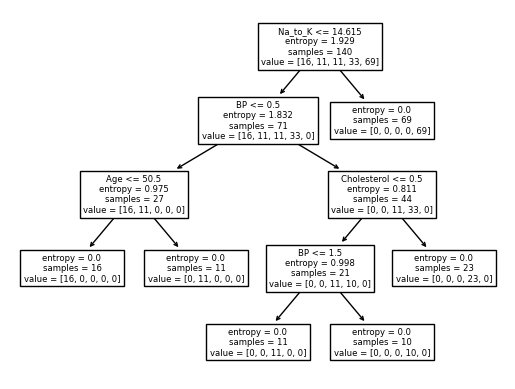

<Figure size 640x480 with 0 Axes>

In [4]:
if __name__ == "__main__":
    main()